In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!pwd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

/c/Users/USER
Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#responses = pd.read_csv("freeformResponses.csv")
df_responses = pd.read_csv("UoT/multipleChoiceResponses.csv",encoding='ISO-8859-1')

#multipleChoiceResponses
df_responses.head()

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_responses.isnull().sum()

GenderSelect                                  95
Country                                      121
Age                                          331
EmploymentStatus                               0
StudentStatus                              15436
LearningDataScience                        15432
CodeWriter                                  3530
CareerSwitcher                             13704
CurrentJobTitleSelect                       4886
TitleFit                                    5212
CurrentEmployerType                         5115
MLToolNextYearSelect                        5718
MLMethodNextYearSelect                      5883
LanguageRecommendationSelect                5718
PublicDatasetsSelect                        5920
LearningPlatformSelect                      5445
LearningPlatformUsefulnessArxiv            14325
LearningPlatformUsefulnessBlogs            11951
LearningPlatformUsefulnessCollege          13357
LearningPlatformUsefulnessCompany          15735
LearningPlatformUsef

In [8]:
df_responses.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [9]:
df_responses.shape

(16716, 228)

In [10]:

total=df_responses.isnull().sum().sort_values(ascending=False)
percent=df_responses.isnull().sum()/df_responses.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'],sort=True)
missing_data.Percent.sort_values().head(20)

EmploymentStatus                 0.000000
GenderSelect                     0.005683
Country                          0.007239
Age                              0.019801
FormalEducation                  0.101759
FirstTrainingSelect              0.119885
PastJobTitlesSelect              0.150993
Tenure                           0.190476
MajorSelect                      0.205492
CodeWriter                       0.211175
LearningCategoryKaggle           0.214764
LearningCategoryOnlineCourses    0.214764
LearningCategoryUniversity       0.215004
LearningCategoryWork             0.215662
LearningCategorySelftTaught      0.215781
LearningCategoryOther            0.216679
MLSkillsSelect                   0.237078
DataScienceIdentitySelect        0.241984
ParentsEducation                 0.242163
MLTechniquesSelect               0.247188
Name: Percent, dtype: float64

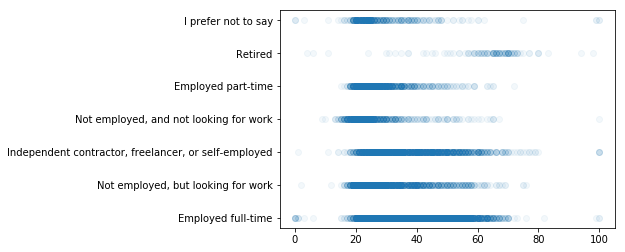

In [11]:
plt.scatter( df_responses.Age, df_responses.EmploymentStatus,alpha=0.05)


In [12]:
#plt.scatter( df_responses.GenderSelect, df_responses.LearningDataScience,alpha=0.05)
#df_responses.GenderSelect
#crosstab(titanic_df.Survived,titanic_df.Sex,normalize=True, margins=True)
Employed_By_Gender = pd.crosstab(df_responses.EmploymentStatus,df_responses.GenderSelect,normalize=True, margins=True)
Employed_By_Gender
Employed_By_Gender/Employed_By_Gender.loc['All']


GenderSelect,A different identity,Female,Male,"Non-binary, genderqueer, or gender non-conforming",All
EmploymentStatus,,,,,
Employed full-time,0.005716,0.098731,0.545936,0.002587,0.652969
Employed part-time,0.000602,0.013477,0.040551,0.000120,0.054750
I prefer not to say,0.000902,0.005415,0.017688,0.000301,0.024307
"Independent contractor, freelancer, or self-employed",0.000842,0.009927,0.068046,0.000662,0.079478
"Not employed, and not looking for work",0.000662,0.011431,0.042958,0.000241,0.055291
"Not employed, but looking for work",0.000481,0.027736,0.097648,0.000361,0.126226
Retired,0.000361,0.000421,0.006016,0.000180,0.006979
All,0.009566,0.167138,0.818844,0.004452,1.000000


GenderSelect,A different identity,Female,Male,"Non-binary, genderqueer, or gender non-conforming",All
EmploymentStatus,,,,,
Employed full-time,0.597484,0.590713,0.666716,0.581081,0.652969
Employed part-time,0.062893,0.080634,0.049522,0.027027,0.054750
I prefer not to say,0.094340,0.032397,0.021602,0.067568,0.024307
"Independent contractor, freelancer, or self-employed",0.088050,0.059395,0.083101,0.148649,0.079478
"Not employed, and not looking for work",0.069182,0.068395,0.052461,0.054054,0.055291
"Not employed, but looking for work",0.050314,0.165947,0.119251,0.081081,0.126226
Retired,0.037736,0.002520,0.007348,0.040541,0.006979
All,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x23ba9d789e8>,
 [Text(-0.926613,0.59278,'Male'),
  Text(0.899617,-0.633,'Female'),
  Text(1.09815,-0.0637943,'A different identity'),
  Text(1.09989,-0.0153854,'Non-binary, genderqueer, or gender non-conforming')],
 [Text(-0.505425,0.323334,'81.9%'),
  Text(0.4907,-0.345273,'16.7%'),
  Text(0.59899,-0.0347969,'1.0%'),
  Text(0.599941,-0.00839206,'0.4%')])

Text(0.5,1,'Gender Distribution')

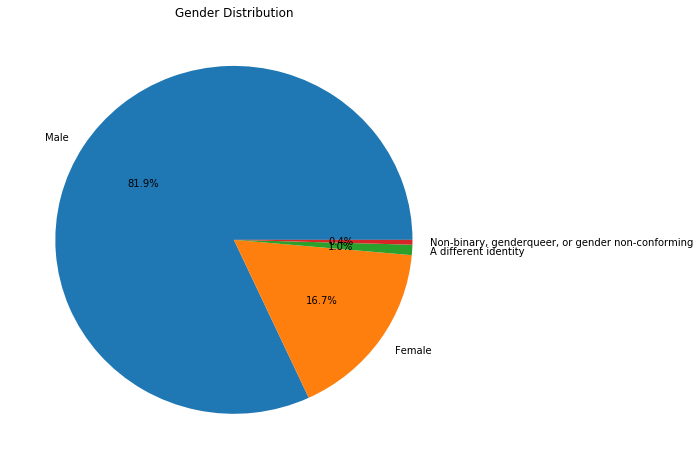

Proportion of women in this survey: 16.71% 
Proportion of men in this survey: 81.88% 


In [13]:

plt.figure(figsize=(8,8))
gender=df_responses['GenderSelect'].value_counts()
plt.pie(gender,labels=gender.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
plt.title('Gender Distribution')

plt.show()
print('Proportion of women in this survey: {:0.2f}% '.format(100*len(df_responses[df_responses['GenderSelect']=='Female'])/len(df_responses['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}% '.format(100*len(df_responses[df_responses['GenderSelect']=='Male'])/len(df_responses['GenderSelect'].dropna())))

<Figure size 720x720 with 0 Axes>

([<matplotlib.patches.Wedge at 0x23ba9dcb5c0>,
 [Text(1.09942,0.0355712,'I prefer not to answer'),
  Text(1.08646,0.172039,'I did not complete any formal education past high school'),
  Text(1.00818,0.439959,'Professional degree'),
  Text(0.720998,0.830759,"Some college/university study without earning a bachelor's degree"),
  Text(-0.439597,1.00834,'Doctoral degree'),
  Text(-0.17321,-1.08628,"Bachelor's degree")],
 [Text(0.599686,0.0194025,'1.0%'),
  Text(0.592616,0.0938394,'2.9%'),
  Text(0.549919,0.239978,'5.2%'),
  Text(0.393272,0.453142,'9.0%'),
  Text(-0.23978,0.550005,'26.8%'),
  Text(-0.0944782,-0.592515,'55.0%')])

Text(0.5,1,'Highest Degree achieved by the participants')

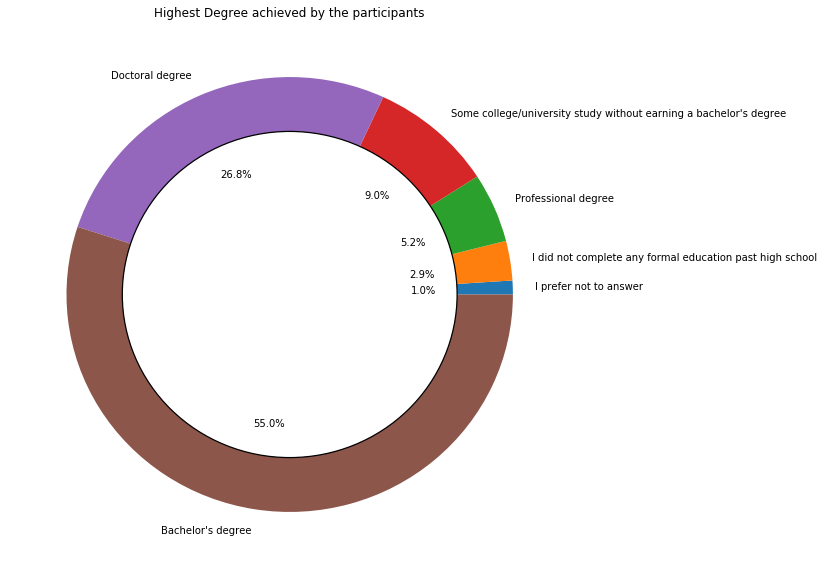

In [14]:

education=df_responses['FormalEducation'].value_counts().sort_values()[:6]
plt.figure(figsize=(10,10))
plt.pie(x=education,labels=education.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Highest Degree achieved by the participants')
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Nationality Distributions')

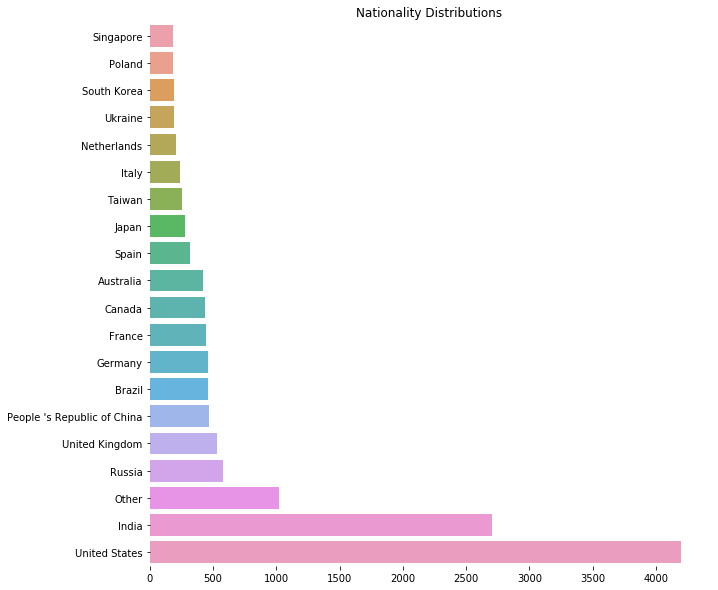

25.11% of the instances are Americans
16.18% of the instances are Indians
31.10% of the instances are contributed by top 5 countries


In [15]:
import seaborn as sns
country=df_responses['Country'].value_counts().sort_values().tail(20)
plt.figure(figsize=(10,10))
sns.barplot(y=country.index, x=country.values,alpha=0.9)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Nationality Distributions')
plt.show();
top_5=0
for i in [1,2,4,5,6]:
    top_5=top_5+country.sort_values(ascending=False)[i]
top_5=100*(top_5/len(df_responses))
print('{:0.2f}% of the instances are Americans'.format(100*len(df_responses[df_responses['Country']=='United States'])/len(df_responses)))
print('{:0.2f}% of the instances are Indians'.format(100*len(df_responses[df_responses['Country']=='India'])/len(df_responses)))
print('{:0.2f}% of the instances are contributed by top 5 countries'.format(top_5))

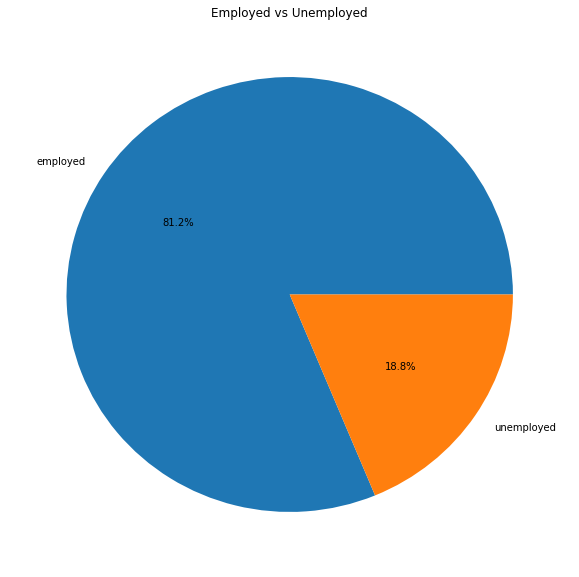

In [16]:

employment=df_responses['EmploymentStatus'].value_counts()
employment_df=pd.DataFrame(employment)
n_employed= employment[0]+employment[2]+employment[4]
n_unemployed=employment[1]+employment[3]
x=[n_employed,n_unemployed]
plt.figure(figsize=(10,10))
plt.pie(x=x,labels=['employed','unemployed'],autopct='%1.1f%%')
plt.title("Employed vs Unemployed")
plt.show();

In [17]:

employment=df_responses['EmploymentStatus'].value_counts()
employment_df=pd.DataFrame(employment)
employment_df

,EmploymentStatus
Employed full-time,10897
"Not employed, but looking for work",2110
"Independent contractor, freelancer, or self-employed",1330
"Not employed, and not looking for work",924
Employed part-time,917
I prefer not to say,420
Retired,118


In [18]:

total=df_responses.isnull().sum().sort_values(ascending=False)
percent=df_responses.isnull().sum()/df_responses.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'],sort=True)
missing_data.Percent.sort_values().head(20)

EmploymentStatus                 0.000000
GenderSelect                     0.005683
Country                          0.007239
Age                              0.019801
FormalEducation                  0.101759
FirstTrainingSelect              0.119885
PastJobTitlesSelect              0.150993
Tenure                           0.190476
MajorSelect                      0.205492
CodeWriter                       0.211175
LearningCategoryKaggle           0.214764
LearningCategoryOnlineCourses    0.214764
LearningCategoryUniversity       0.215004
LearningCategoryWork             0.215662
LearningCategorySelftTaught      0.215781
LearningCategoryOther            0.216679
MLSkillsSelect                   0.237078
DataScienceIdentitySelect        0.241984
ParentsEducation                 0.242163
MLTechniquesSelect               0.247188
Name: Percent, dtype: float64

In [19]:
missing_data.Percent1=0
missing_data.Percent1=missing_data.Percent<0.15
missing_data.Percent1

Age                                        True
AlgorithmUnderstandingLevel               False
BlogsPodcastsNewslettersSelect            False
CareerSwitcher                            False
CodeWriter                                False
CompensationAmount                        False
CompensationCurrency                      False
Country                                    True
CoursePlatformSelect                      False
CurrentEmployerType                       False
CurrentJobTitleSelect                     False
DataScienceIdentitySelect                 False
EmployerIndustry                          False
EmployerMLTime                            False
EmployerSearchMethod                      False
EmployerSize                              False
EmployerSizeChange                        False
EmploymentStatus                           True
FirstTrainingSelect                        True
FormalEducation                            True
GenderSelect                            

In [20]:
Employed_By_JobTitle = pd.crosstab(df_responses.CurrentJobTitleSelect,df_responses.GenderSelect,normalize=True, margins=True)
Employed_By_JobTitle
Employed_By_JobTitle/Employed_By_JobTitle.loc['All']

GenderSelect,A different identity,Female,Male,"Non-binary, genderqueer, or gender non-conforming",All
CurrentJobTitleSelect,,,,,
Business Analyst,0.000594,0.012472,0.053962,0.000170,0.067198
Computer Scientist,0.000509,0.003054,0.024605,0.000085,0.028254
DBA/Database Engineer,0.000170,0.002376,0.013151,0.000085,0.015781
Data Analyst,0.000764,0.023248,0.078228,0.000170,0.102410
Data Miner,0.000000,0.001273,0.008569,0.000085,0.009927
Data Scientist,0.001273,0.030460,0.173172,0.000848,0.205753
Engineer,0.000255,0.004412,0.041575,0.000339,0.046581
Machine Learning Engineer,0.000339,0.005939,0.045732,0.000170,0.052181
Operations Research Practitioner,0.000170,0.000848,0.003648,0.000170,0.004836


GenderSelect,A different identity,Female,Male,"Non-binary, genderqueer, or gender non-conforming",All
CurrentJobTitleSelect,,,,,
Business Analyst,0.066038,0.081531,0.064726,0.039216,0.067198
Computer Scientist,0.056604,0.019967,0.029514,0.019608,0.028254
DBA/Database Engineer,0.018868,0.015530,0.015774,0.019608,0.015781
Data Analyst,0.084906,0.151969,0.093833,0.039216,0.102410
Data Miner,0.000000,0.008319,0.010279,0.019608,0.009927
Data Scientist,0.141509,0.199113,0.207714,0.196078,0.205753
Engineer,0.028302,0.028841,0.049868,0.078431,0.046581
Machine Learning Engineer,0.037736,0.038824,0.054854,0.039216,0.052181
Operations Research Practitioner,0.018868,0.005546,0.004376,0.039216,0.004836


<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x23bab3e56a0>,
 [Text(0.878274,0.662295,'Data Scientist'),
  Text(-0.206177,1.08051,'Software Developer/Software Engineer'),
  Text(-0.915447,0.609882,'Other'),
  Text(-1.09789,-0.06802,'Data Analyst'),
  Text(-0.879855,-0.660194,'Scientist/Researcher'),
  Text(-0.484366,-0.987618,'Business Analyst'),
  Text(-0.088125,-1.09646,'Researcher'),
  Text(0.270049,-1.06634,'Machine Learning Engineer'),
  Text(0.582884,-0.93287,'Engineer'),
  Text(0.810056,-0.744184,'Programmer'),
  Text(0.948315,-0.557404,'Computer Scientist'),
  Text(1.02727,-0.393341,'Statistician'),
  Text(1.06866,-0.260694,'DBA/Database Engineer'),
  Text(1.089,-0.155179,'Predictive Modeler'),
  Text(1.09788,-0.0683116,'Data Miner'),
  Text(1.09987,-0.0169422,'Operations Research Practitioner')],
 [Text(0.479059,0.361252,'20.6%'),
  Text(-0.11246,0.589366,'14.9%'),
  Text(-0.499335,0.332663,'10.4%'),
  Text(-0.598852,-0.0371018,'10.3%'),
  Text(-0.479921,-0.360106,'8.3%'),
  Text(-0.2642,-0

Text(0.5,1,'Job Distribution')

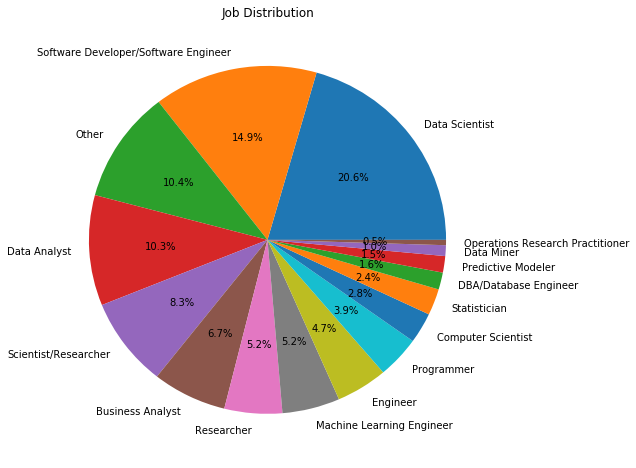

In [21]:
# Osmedo Barbosa #
plt.figure(figsize=(8,8))
JobTitle=df_responses['CurrentJobTitleSelect'].value_counts()
plt.pie(JobTitle,labels=JobTitle.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
plt.title('Job Distribution')